## Notebook to use NMF and Clustering Algorithm

In [3]:
import SimDAT2D as sim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import IsoDat2D as iso
from PIL import Image
import pyFAI, fabio
from pyFAI.gui import jupyter
import pyFAI
import os
import matplotlib.pyplot as plt
import masking

ModuleNotFoundError: No module named 'dask'

### Creating the synthetic data

Select calibrant:
1. AgBh
2. Al
3. alpha_Al2O3
4. Au
5. C14H30O
6. CeO2
7. Cr2O3
8. cristobaltite
9. CrOx
10. CuO
11. hydrocerussite
12. LaB6
13. LaB6_SRM660a
14. LaB6_SRM660b
15. LaB6_SRM660c
16. mock
17. NaCl
18. Ni
19. PBBA
20. Pt
21. quartz
22. Si
23. Si_SRM640
24. Si_SRM640a
25. Si_SRM640b
26. Si_SRM640c
27. Si_SRM640d
28. Si_SRM640e
29. TiO2
30. ZnO
Al


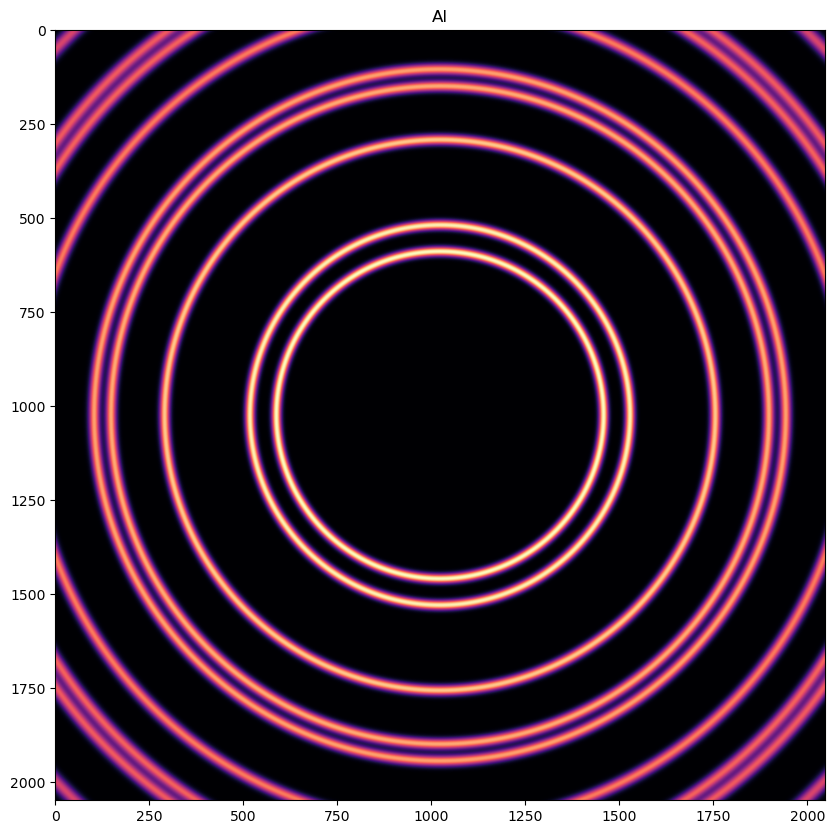

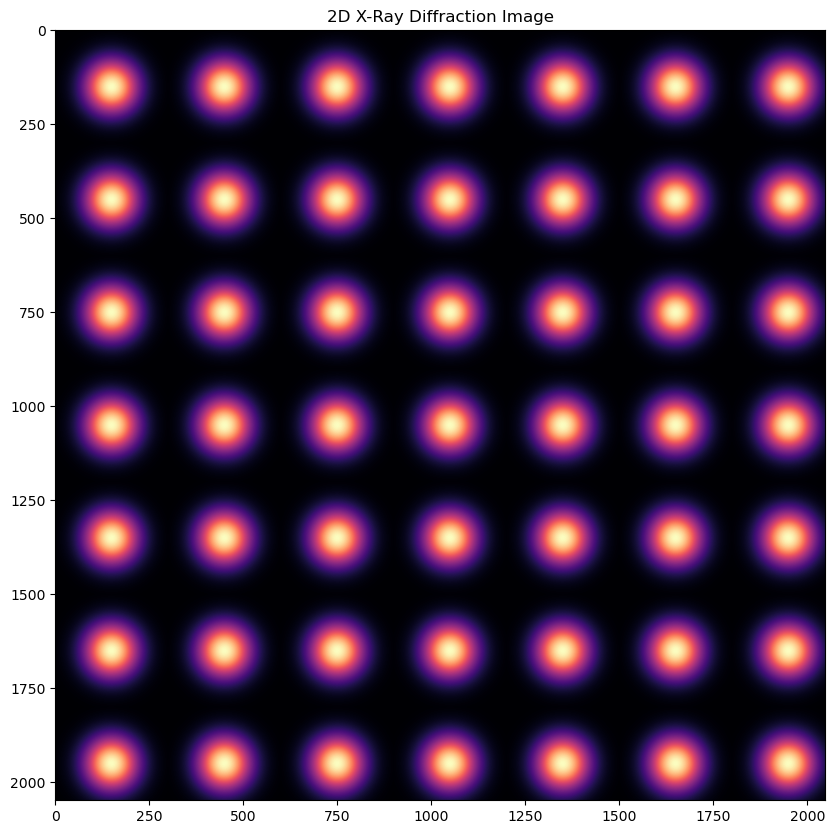

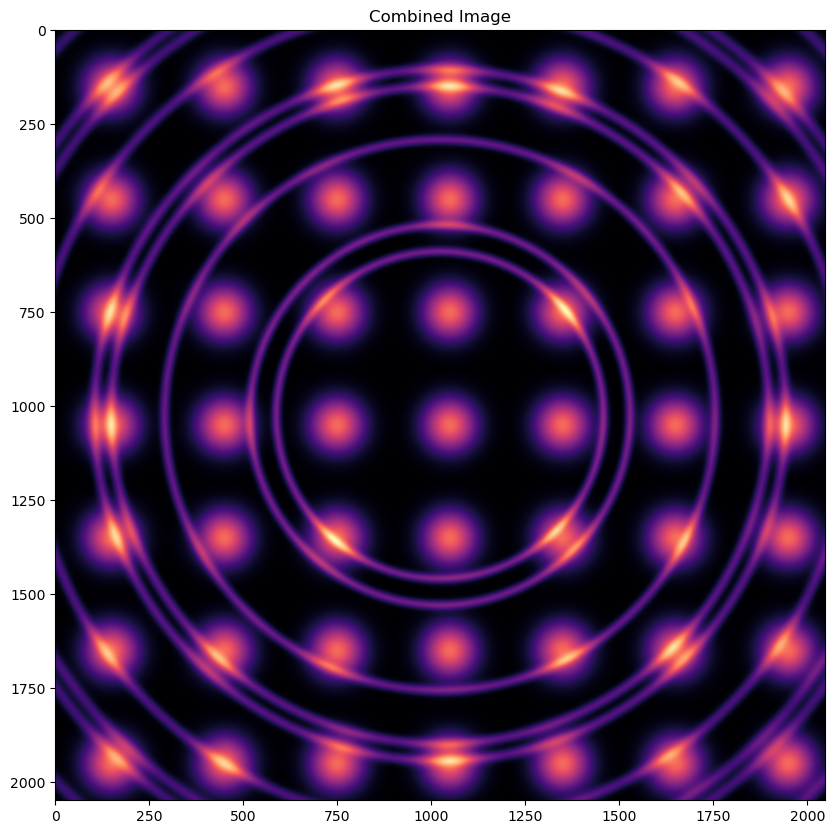

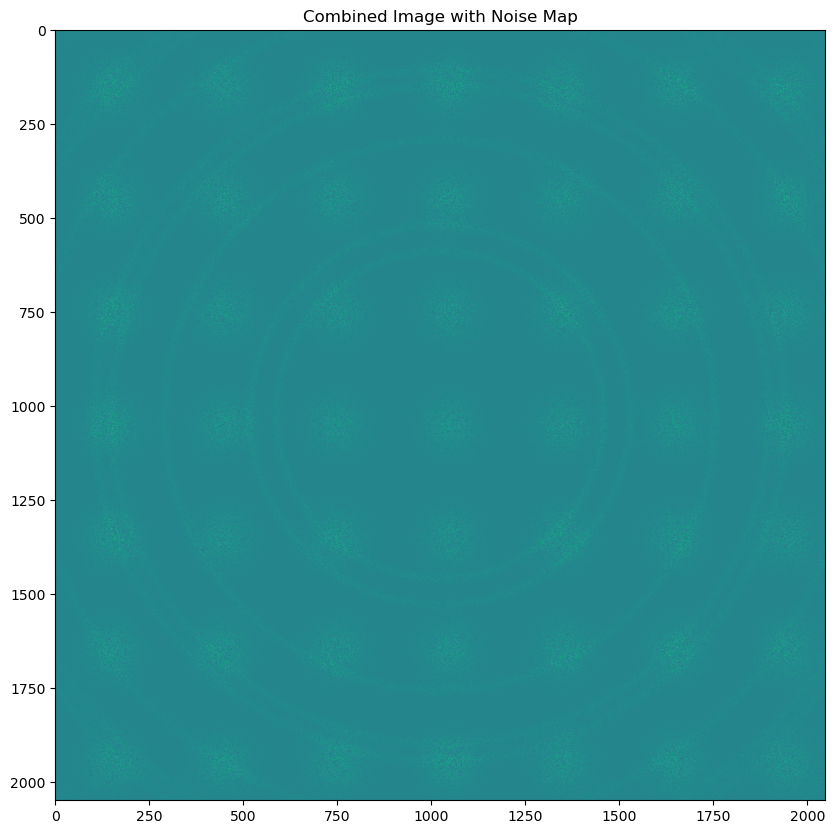

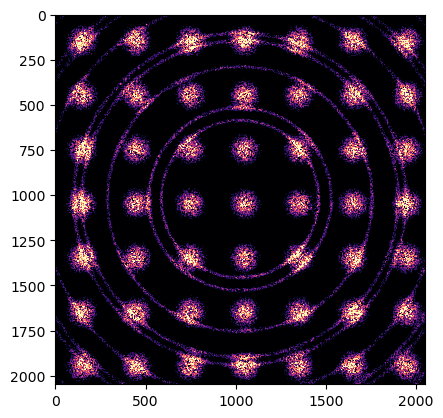

In [27]:
#For ring creation
isotropic_signal = sim.create_isotropic(.4, .5e-10, cmap = 'magma')
#For spot creation
anisotropic_signal = sim.create_anisotropic(25, 50, 300, 300, cmap = 'magma')
#combining signals 
thin_film = sim.combine_image(isotropic_signal, anisotropic_signal*2, cmap= 'magma')
#For noisy data
noisy_im = sim.generate_noisemap(thin_film);
plt.imshow(noisy_im, vmin = 1, vmax = 5, cmap = 'magma')

### Integrating and plotting 1D data

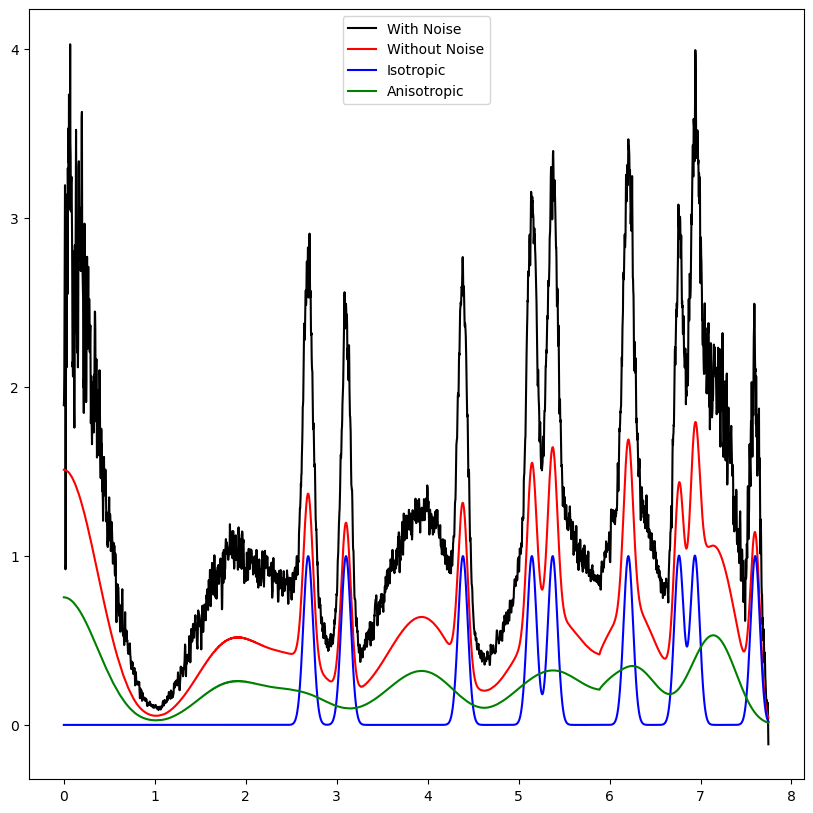

In [28]:
#using simdat2d to integrate the image
q_noisy, noisy_integrated_im = sim.integrate_image(noisy_im, .4, .5e-10, resolution = 3000)
q, integrated_im = sim.integrate_image(thin_film, .4, .5e-10, resolution = 3000)
q_reg, integrated_reg = sim.integrate_image(isotropic_signal, .4, .5e-10, resolution = 3000)
q_aniso, integrated_aniso = sim.integrate_image(anisotropic_signal, .4, .5e-10, resolution = 3000)

#matplotlib plot
plt.figure(figsize = (10,10))
plt.plot(q_noisy, noisy_integrated_im, c= 'k', label = 'With Noise')
plt.plot(q, integrated_im, c= 'r', label = 'Without Noise')
plt.plot(q_reg, integrated_reg, c= 'b', label = 'Isotropic')
plt.plot(q_aniso, integrated_aniso, c= 'g', label = 'Anisotropic')
plt.plot()
plt.legend()

### Generating mask for 360 integration

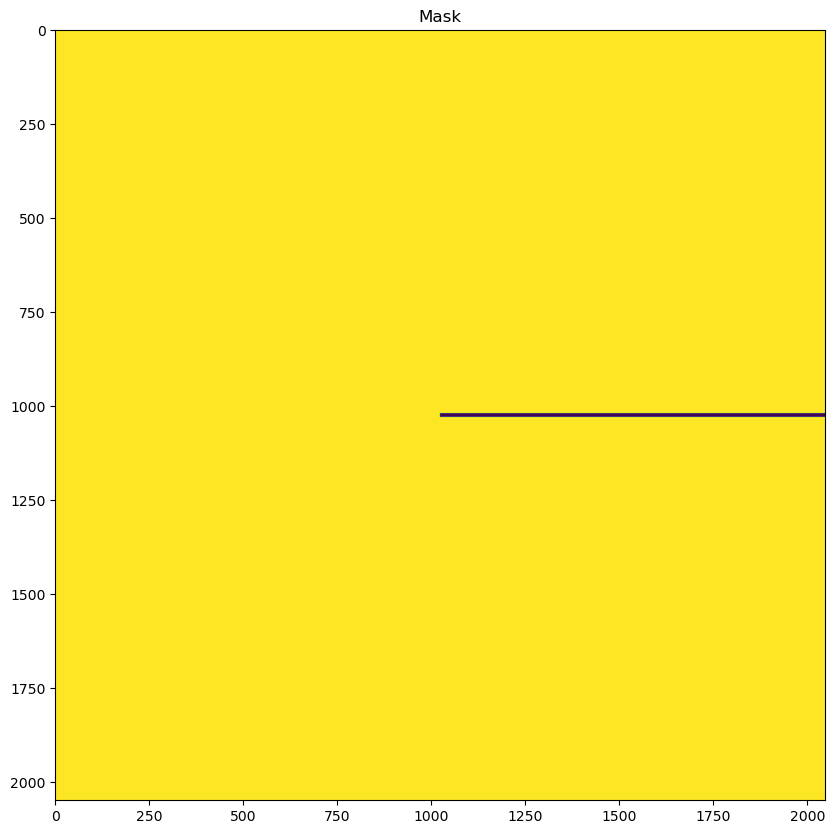

In [29]:
mask = sim.create_mask(thin_film, 5)

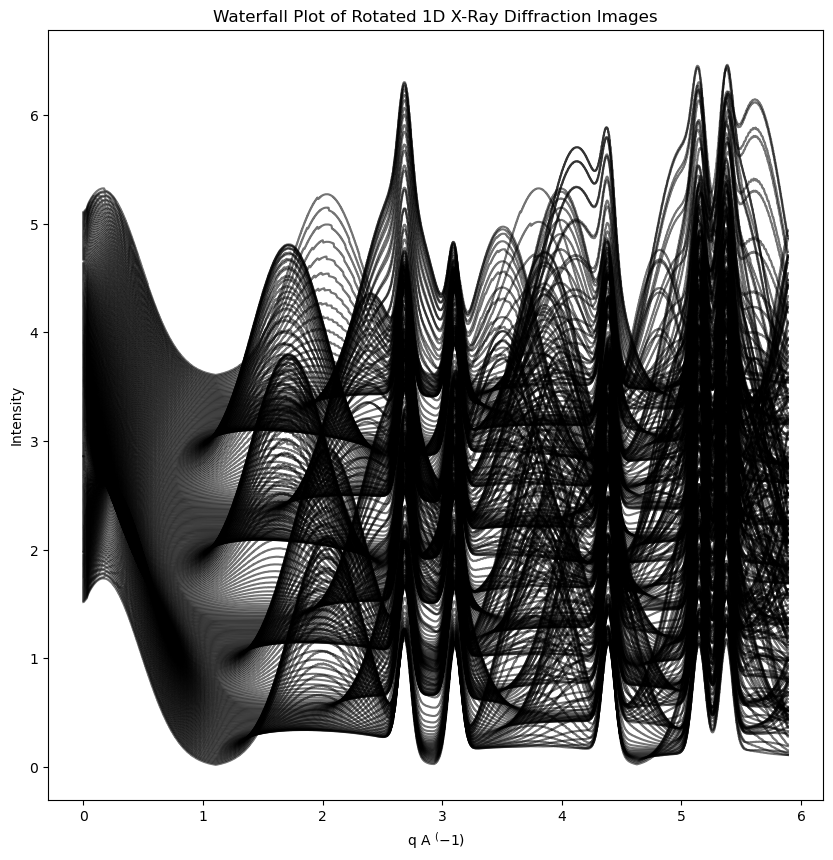

In [30]:
q, data = sim.rotate_and_integrate(thin_film, 1, .4, .5e-10, resolution = 3000, mask = mask)

### Running IsoDAT2D on the generated data from rotate and integrate

           254       253       339       72        98        114       40   \
0     1.502092  1.502092  1.518099  1.518107  1.518107  1.518107  1.518099   
1     1.502096  1.502096  1.518103  1.518103  1.518103  1.518103  1.518103   
2     1.501175  1.501175  1.518012  1.518944  1.518944  1.518064  1.519674   
3     1.496337  1.496337  1.517653  1.523270  1.523270  1.517654  1.528738   
4     1.493730  1.493799  1.517584  1.525674  1.525609  1.517590  1.533476   
...        ...       ...       ...       ...       ...       ...       ...   
2995  0.255209  0.282530  0.431915  1.817426  0.020531  0.048849  0.039035   
2996  0.254612  0.281955  0.431339  1.815972  0.020495  0.048780  0.039114   
2997  0.249902  0.276412  0.425558  1.800747  0.020163  0.048267  0.039723   
2998  0.244891  0.270546  0.419497  1.784671  0.019810  0.047712  0.040358   
2999  0.244881  0.270534  0.419532  1.784635  0.019812  0.047710  0.040361   

           319       295       340  ...       329       309    

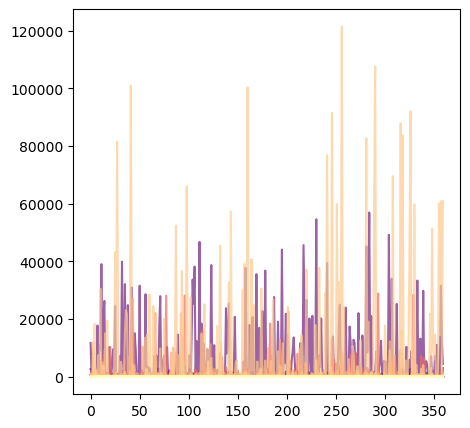

In [31]:
my_dict, my_comps = iso.run_nmfac(data, clusters = 7)

cluster_groups2 = {}
for cluster_num in set(my_dict['Cluster_Number']):
    cluster_groups2[cluster_num] = []

# Group the data based on cluster numbers
for cluster_num, int_angle in zip(my_dict['Cluster_Number'], my_dict['Int_Angle']):
    cluster_groups2[cluster_num].append(int_angle)
    
np.save('example.npy', cluster_groups2)

### Loading and sorting data into respective clusters

In [32]:
#loading in the previously saved data
dataset = np.load('example.npy', allow_pickle=True)

#getting cluster 1 - 7
cluster1 = dataset.item().get(0)
cluster2 = dataset.item().get(1)
cluster3 = dataset.item().get(2)
cluster4 = dataset.item().get(3)
cluster5 = dataset.item().get(4)
cluster6 = dataset.item().get(5)
cluster7 = dataset.item().get(6)

#creating a consistent q value for all clusters
q = np.linspace(0, 25, 3000)

### Creating a visual to view all of the clusters

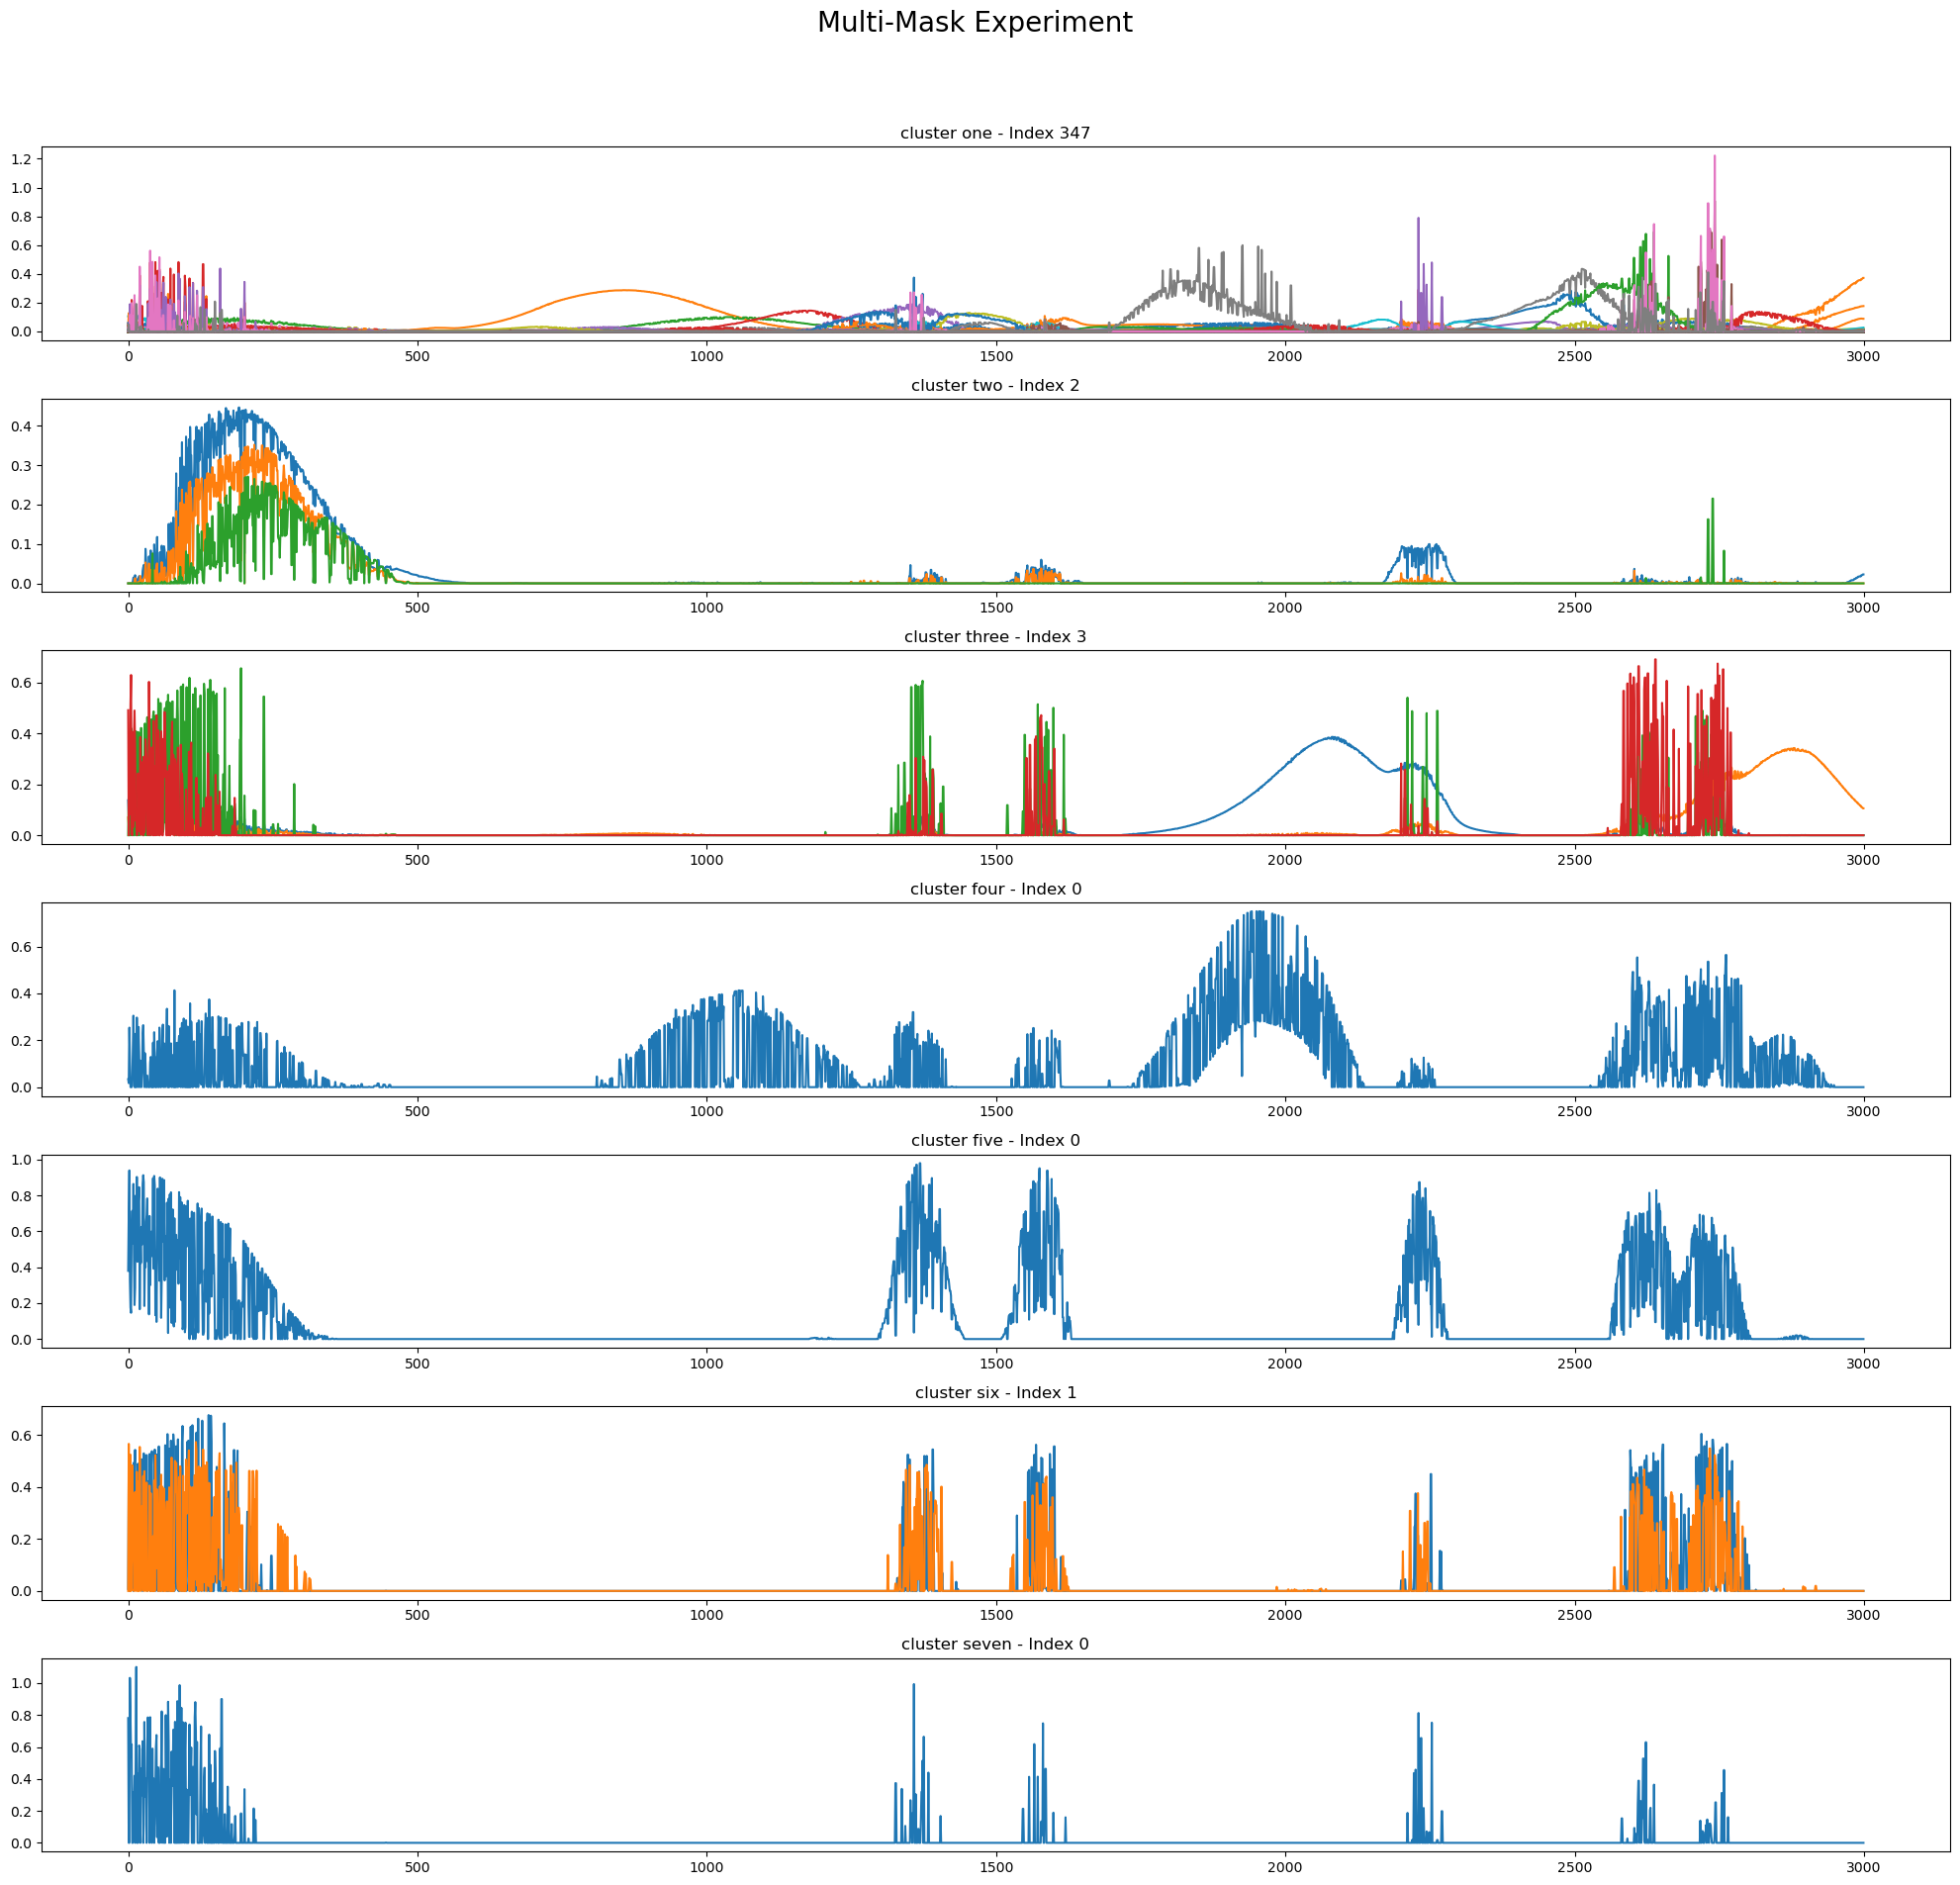

In [33]:
fig, axs = plt.subplots(7,1, figsize=(20, 20))
fig.suptitle('Multi-Mask Experiment', fontsize=20)

# Plotting cluster one
for i in range(len(cluster1)):
    axs[0].plot(cluster1[i])
    axs[0].set_title(f'cluster one - Index {i}')

# Plotting cluster two
for i in range(len(cluster2)):
    axs[1].plot(cluster2[i])
    axs[1].set_title(f'cluster two - Index {i}')
    
# Plotting cluster two
for i in range(len(cluster3)):
    axs[2].plot(cluster3[i])
    axs[2].set_title(f'cluster three - Index {i}')
    
# Plotting cluster two
for i in range(len(cluster4)):
    axs[3].plot(cluster4[i])
    axs[3].set_title(f'cluster four - Index {i}')
    
# Plotting cluster two
for i in range(len(cluster5)):
    axs[4].plot(cluster5[i])
    axs[4].set_title(f'cluster five - Index {i}')
    
# Plotting cluster two
for i in range(len(cluster6)):
    axs[5].plot(cluster6[i])
    axs[5].set_title(f'cluster six - Index {i}')
    
# Plotting cluster two
for i in range(len(cluster7)):
    axs[6].plot(cluster7[i])
    axs[6].set_title(f'cluster seven - Index {i}')
    
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    
# Setting the x and y limits for all subplots
#for ax in axs.flat:
  #  ax.set_xlim(0, 350)
    #ax.set_ylim(-0.05, 0.6)

### Smoothing and Averaging clusters that look lik eisotropic signal

In [36]:
avg_clust_list = [cluster5, cluster6]
averaged_clusters = np.array(iso.average_clusters(avg_clust_list))
smooth_clust = iso.smooth_averaged_cluster(averaged_clusters)

3000
3000
150
2
<class 'numpy.ndarray'>


### Plotting the Isodat2d signals and the isotropic signal of interest

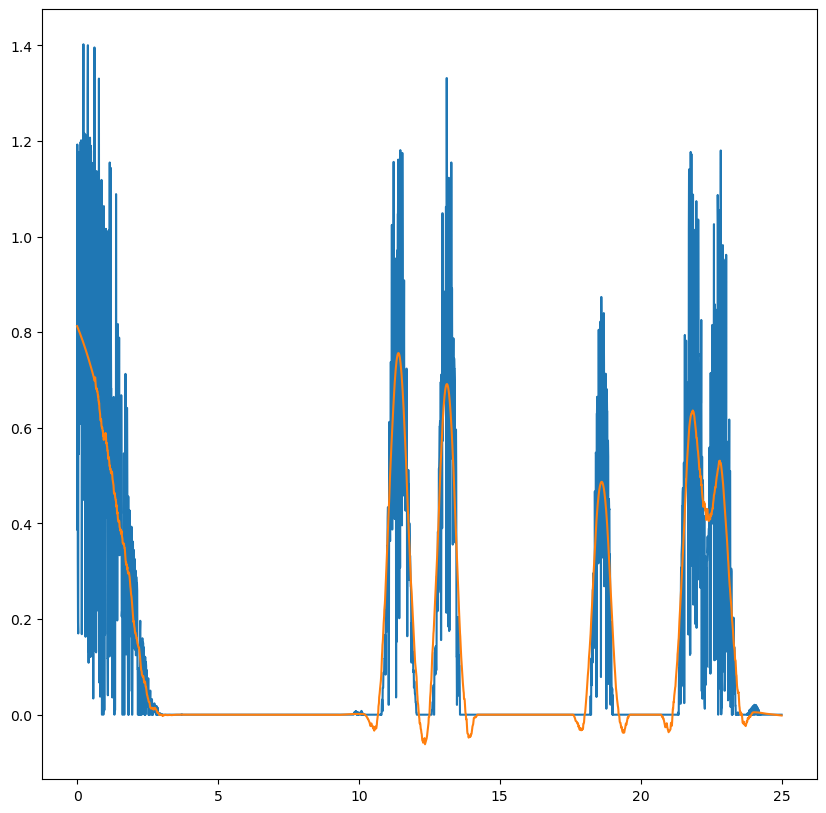

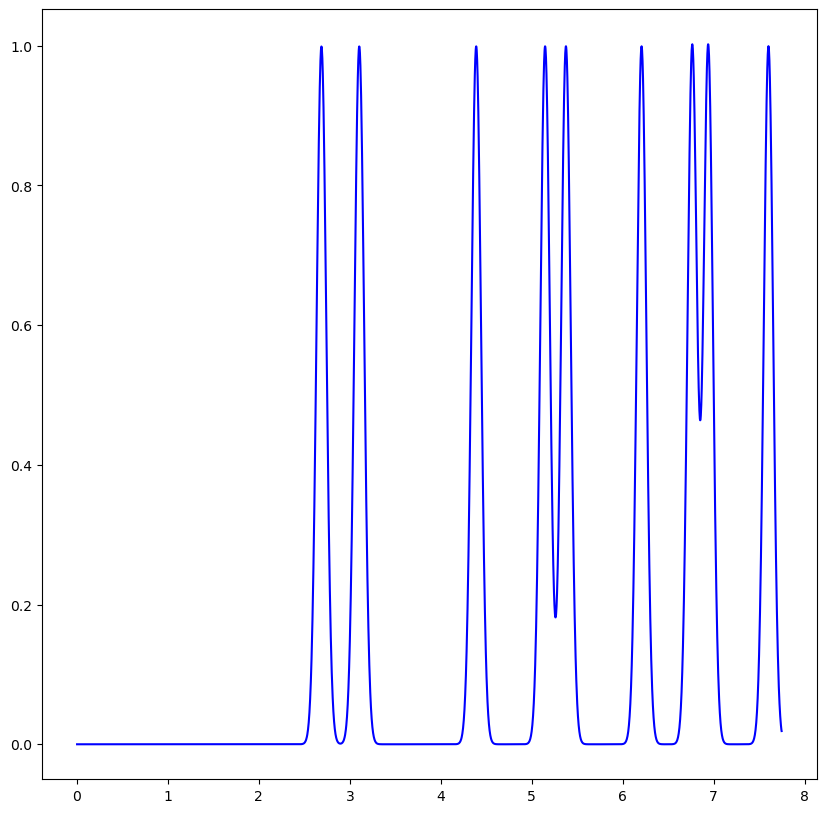

In [53]:
plt.figure(figsize = (10,10))
plt.plot(q, averaged_clusters)
plt.plot(q, smooth_clust)


plt.figure(figsize = (10,10))
plt.plot(q_reg, integrated_reg, c= 'b', label = 'Isotropic')